# Modeling a refrigeration unit

This is a continuation of the lecture on Wednesday 2024 October 30
which developed the differential mole/mass and energy balances for a
refrigeration system.  The lecture was based on the [Refrigeration video](https://classes.myplace.strath.ac.uk/mod/page/view.php?id=1567138) that can be found on
Myplace.

A mole balance on the vessel gave
\begin{align*}
\frac{dN_l}{dt}
&=
\dot{N}_{\rm in}
- \dot{N}_{\rm out}
\end{align*}
where $N_l$ is the number of moles of liquid refrigerant in the vessel, $\dot{N}_{\rm in}$ is the molar flow rate of liquid refrigerant into the vessel, and $\dot{N}_{\rm out}$ is the molar flow rate of vapor refrigerant that exits the vessel.

An energy balance on the vessel gives
\begin{align*}
N_l C \frac{dT}{dt}
&=
\dot{N}_{\rm in} C(T_{\rm in} - T)
- \dot{N}_{\rm out} \Delta H
- hS (T - T_C)
\end{align*}
where $C$ is the heat capacity of the liquid refrigerant, $\Delta H$ is the molar enthalpy of vaporization of the refrigerant, $T_{\rm in}$ is the temperature of the liquid refrigerant that is fed to the vessel, $T_C$ is the temperature of the environment that surrounds the vessel, $h$ is a heat transfer coefficient between the vessel and its surroundings, and $S$ is the area for heat transfer.


## Analytical solution

We will look for an analytical solution to this problem in the special
case where the inlet and outlet flow rates are equal and constant
(i.e. $\dot{N}_{\rm in}=\dot{N}_{\rm out}=\dot{N}$).  In this case,
the mole equation has the simple solution that the number of mole of
refrigerant in the vessel, which is approximately $N_l$, remains
constant.

The energy balance equation can be rearranged as:
\begin{align*}
\frac{dT}{dt}
&=
\frac{\dot{N}_{\rm in}}{N_l}(T_{\rm in} - T)
- \frac{\dot{N}_{\rm out} \Delta H}{N_l C}
- \frac{hS}{N_l C} (T - T_C)
\end{align*}
In its present form, this equation looks complicated to solve.  To try
to make things more clear, we separate terms that are constants from
terms that depend on the function $T$ that we are trying to solve for:
\begin{align*}
\frac{dT}{dt}
&=
\left[\frac{\dot{N}_{\rm in}}{N_l} T_{\rm in}
- \frac{\dot{N}_{\rm out} \Delta H}{N_l C}
+ \frac{hS}{N_l C} T_C\right]
- \left[
    \frac{\dot{N}_{\rm in}}{N_l} + \frac{hS}{N_l C}\right] T
\end{align*}
The first term in square brackets is constant, while the second term
depends linearly on the unknown function $T(t)$.  To simplify things a
bit, we define a constant $A$ as
\begin{align*}
A &= \frac{\dot{N}_{\rm in}}{N_l} T_{\rm in}
- \frac{\dot{N}_{\rm out} \Delta H}{N_l C}
+ \frac{hS}{N_l C} T_C
\end{align*}
and a constant $\tau$ as:
\begin{align*}
\frac{1}{\tau}
&=
\frac{\dot{N}_{\rm in}}{N_l} + \frac{hS}{N_l C}
\end{align*}
Note that the symbol $\tau$ was used for the second constant because
it has units of time, as this suggests that it represents a time scale
of the system.  With these newly defined constants, the energy balance
equation simplifies to
\begin{align*}
\frac{dT(t)}{dt}
&=
A - \frac{T(t)}{\tau}
\\
&=
\frac{1}{\tau}[
\tau A - T(t)]
\end{align*}

If we consider steady-state operation of the vessel, we can find a
physical interpretation of the quantity $\tau A$.  At steady state,
the properties of the system do not change with time, and so
$dT/dt=0$.  If the temperature at steady state is $T_\infty$, then we
find
\begin{align*}
0 &= \frac{1}{\tau}[\tau A - T_\infty]
\end{align*}
or \begin{align*} T_\infty = \tau A \end{align*}.  So the combination
$\tau A$ is the steady state temperature of the system.

We rewrite the energy balance as
\begin{align*}
\frac{dT(t)}{dt}
&=
\frac{1}{\tau}[
T_\infty - T(t)]
\end{align*}
This can be solved by separation of variables:
\begin{align*}
\frac{dT}{T_\infty - T}
&=
\frac{dt}{\tau}[
\\
-\ln|T_\infty-T|
&=
\frac{t}{\tau}
+ \mbox{const}
\end{align*}
where $\mbox{const}$ is an unknown constant that can be determined
from the initial condition $T(0)=T_0$:
\begin{align*}
-\ln|T_\infty-T_0|
&=
\frac{0}{\tau}
+ \mbox{const}
\\
\mbox{const}
&=
-\ln|T_\infty-T_0|
\end{align*}
The solution is then
\begin{align*}
T(t)
&=
T_\infty
-(T_\infty-T_0) e^{-t/\tau}
\end{align*}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t_list = np.linspace(0.0, 5, 100)
T_list = [np.exp(-t) for t in t_list]

plt.plot(t_list, T_list)
plt.xlabel(r'$t/\tau$')
plt.ylabel(r'$[T(t)-T_\infty]/[T_0-T_\infty]$')
plt.show()


If we want to
we ac

Below we plot the analytical solution of the

We can get data for this refrigerant from
[Wikipedia](https://en.wikipedia.org/wiki/1,1,1,2-Tetrafluoroethane_(data_page)).

A parameter = 333.21633191762976 K / s
time constant = 0.5864993698250396 s
steady state temperature: 195.43116868510108 K


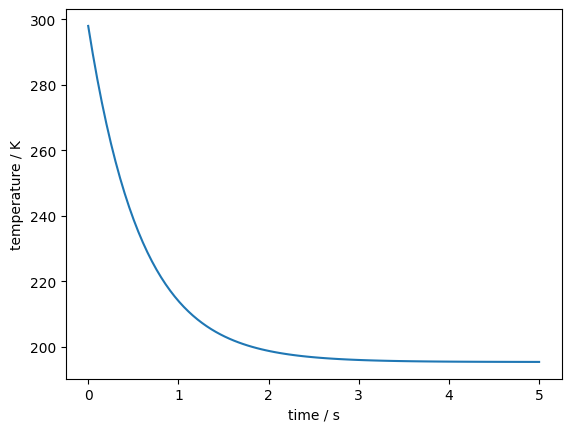

In [ ]:
Nl_0 = 1           # initial moles in vessel
dotN = 1           # mol / s
T0 = 298           # K
TC = -6 + 273.15   # K
Tin = 298          # K
hS = 1             # kW / K

# properties of R134a, taken from Wikipedia
Mw = 102.03         # molecular weight / kg kmol^{-1}
C = 0.339*4.184   # liquid heat capacity / kJ kg^{-1} K^{-1}
DeltaH = 217.2   #  enthalpy of vaporization / kJ kg^{-1}
Tref = 25 + 273.15   # reference temperature / K
pref = 666.1         # vapor pressure at reference temperature / kPa

dotN_in = dotN
dotN_out = dotN
Nl = Nl_0


A = dotN_in/Nl * Tin - dotN_out * DeltaH/(Nl*C) + hS*TC/(Nl*C)
tau_inv = dotN_in/Nl + hS/(Nl*C)
tau = 1/tau_inv
T_inf = tau*A

print(f'A parameter = {A} K / s')
print(f'time constant = {tau} s')
print(f'steady state temperature: {T_inf} K')

import numpy as np
t_list = np.linspace(0.0, 5, 100)
T_list = [T_inf + (T0-T_inf)*np.exp(-t/tau) for t in t_list]

import matplotlib.pyplot as plt

plt.plot(t_list, T_list)
plt.xlabel('time / s')
plt.ylabel('temperature / K')
plt.show()



## Euler's method

While it is nice that we have obtained an anlytical solution for this problem, for many real world situations that we will encounter, no analytical solutions exist.  

We will examine the use of Euler's method.  This is based on
approximating the derivative with a forward difference.  In the case of
the temperature derivative in the energy balance equation, we have:
\begin{align*}
\frac{dT(t)}{dt}
&\approx
\frac{T(t+\Delta t) - T(t)}{\Delta t}
\end{align*}
This can be rearranged to give
\begin{align*}
T(t+\Delta t)
&\approx
T(t)
+ \frac{dT(t)}{dt} \Delta t
\end{align*}

If we know the temperature of the system at some time $t$, as well as
its time derivative, we can estimate its temperature at a slightly
later time $t+\Delta t$ by using the above formula.  In the energy balance equation,
we have
\begin{align*}
\frac{dT(t)}{dt}
&=
\frac{\dot{N}_{\rm in}}{N_l}(T_{\rm in} - T(t))
- \frac{\dot{N}_{\rm out} \Delta H}{N_l C}
- \frac{hS}{N_l C} (T(t) - T_C)
\end{align*}
We can implement this for the first time step in the code below:





In [ ]:
dt = 0.01  # time step

Told = T0
Tnew = Told + (dotN_in/Nl*(Tin-Told) - dotN_out*DeltaH/(Nl*C) - hS/(Nl*C)*(Told-TC))*dt
print(tnew, Tnew)

The above code can be repeatedly applied to each successive time step to allow us to estimate the temperature of the system at any time in the future.

Below we compare the Euler approximation with the analytical solution.

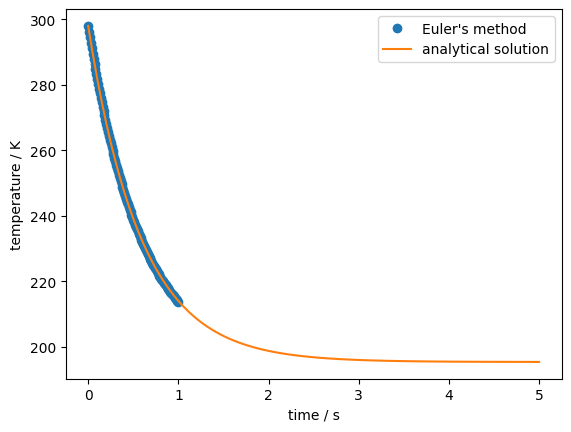

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01

Told = T0
told = 0


T_list = [Told]
t_list = [told]
for i in range(100):
  tnew = told + dt
  Tnew = Told + (dotN_in/Nl*(Tin-Told) - dotN_out*DeltaH/(Nl*C) - hS/(Nl*C)*(Told-TC))*dt
  T_list.append(Tnew)
  t_list.append(tnew)
#  print(tnew, Tnew)
  Told = Tnew
  told = tnew

plt.plot(t_list, T_list, ls='None', marker='o', label="Euler's method")


# Analytical solution
t_list = np.linspace(0.0, 5, 100)
T_list = [T_inf + (T0-T_inf)*np.exp(-t/tau) for t in t_list]
plt.plot(t_list, T_list, label='analytical solution')


plt.legend()
plt.xlabel('time / s')
plt.ylabel('temperature / K')
plt.show()